# Analysis of Titanic Survival Data

## Introduction

The Titanic sank on April 15, 1912 during her maiden voyage. After colliding with an iceberg, 1502 of its 2224 passengers died. The data set investigated in the following sections contains detailed information about 891 passengers.


### Feature description

The data set contains the following parameters for each individual passenger:

| Variable	  | Definition	                             | Key                                            |
|-------------|------------------------------------------|------------------------------------------------|
| PassengerID | Unique passenger ID                      | -                                              |                           
| Survived	  | Survival	                             | 0 = No, 1 = Yes                                |
| Pclass	  | Ticket class	                         | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Name        | Passenger name                           | -                                              |
| Sex	      | Sex                                      | male <br> female                               |
| Age	      | Age in years	                         | -                                              |
| SibSp       | # of siblings/spouses aboard the Titanic | -                                              |
| ParCh       | # of parents/children aboard the Titanic | -                                              |
| Ticket      | Ticket number                            | -                                              |
| Fare	      | Passenger fare                           | -                                              |	
| Cabin	      | Cabin number                             | -                                              |	
| Embarked	  | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton |

Both, categorical (variable that can take on one of a limited number of possible values) and numerical (continuous variable) features are present in the data set.

### Questions to answer

While luck might have been a large factor in the survival of some passengers, I would expect some passenger groups to have higher survival rates than others. The goal of this project is to answer the following questions:

* Which features influenced passenger survival the most?

* Are the survival rates of women, children and the upper-class higher than those of other groups?

## Data wrangling

First, I import all the Python packages required for the data analysis process. Pandas and Numpy are used for data handling and vectorized computations. The re module will be used for some pattern matching later on. Some of the results obtained will be visualized using Matplotlib and Seaborn. The magic jupyter command allows to display graphs within the notebook itself.

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import re

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The `read_csv()` function loads the data into a Pandas DataFrame. To get a first a look at the data table, the first five lines are printed out.

In [2]:
# import data
filename = 'titanic_data.csv'

titanic_df = pd.read_csv(filename, delimiter=',')

# display the first five rows of the data set
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next we look at a few characteristics of the data. Namely its size and the data types used for the different features.

In [3]:
# size of the data set
print("Number of columns: {}, Number of rows: {}".format(titanic_df.shape[1], titanic_df.shape[0]))
print()

# data types of the different variables
titanic_df.dtypes

Number of columns: 12, Number of rows: 891



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
ParCh            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The size of the data frame corresponds with the 12 features for 891 individual passengers. Most columns contain numerical data types (PassengerID, Survived, Pclass, Age, SibSp, ParCh, Fare) denoted as "int64" or "float64" and few contain strings (Name, Sex, Ticket, Cabin, Embarked) marked as "object".

Next, the `describe()` method is used to generate summary statistics of the different features. As most calculations only make sense for numerical data, the `include` parameter is used to generate a separate report for the categorical features

In [4]:
# summary of numerical data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,ParCh,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# summary of categorical data
print(titanic_df.describe(include=['O']))

                                               Name   Sex    Ticket  \
count                                           891   891       891   
unique                                          891     2       681   
top     Hart, Mrs. Benjamin (Esther Ada Bloomfield)  male  CA. 2343   
freq                                              1   577         7   

              Cabin Embarked  
count           204      889  
unique          147        3  
top     C23 C25 C27        S  
freq              4      644  


The print-out of the `describe()` function already reveals some interesting information about the data set:

* Since the `describe()` function excludes NaN values, the "count" values show that the Age, Cabin and Embarked columns have missing values. 

* About 38 % of all passengers included in the data set survived the accident which is close of the overall survival rate of 32 %.

* More than 50 % of the passengers travelled in 3rd class.

* The age feature contains decimal number so rounding might be an appropriate measure.

* Around 25 % of the passengers travelled with a sibling or spouse.

* Most passengers (> 75 %) travelled without children or parents.

* The data contains 891 unique names.

* About 65 % of the passengers were male.

* Since the number of unique tickets is below 891, some passengers must have shared the same ticket number.

### Dropping columns

The dataset contains information that will not be useful for the analysis. These are the "PassengerID" and the "Ticket" columns. Both of these will be dropped. Since the "Cabin" column contains so many "NaN" values, I also remove this one from the data frame.

In [6]:
# drop unwanted columns
titanic_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

# check if it worked properly by displaying the remaining column headers
print(titanic_df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'ParCh' 'Fare' 'Embarked']


### Data Cleaning

The only feature that needs cleaning is the passenger age. To get rid of the the floating point numbers, all values are rounded up to the closest integer. For this purpose the `ceil()` function from the Numpy module is used.

In [7]:
# round up age to the closest integer
titanic_df['Age'] = np.ceil(titanic_df['Age'])

### Filling missing values

The age column contains many missing values. To fill these, we select random numbers x from the following interval:

$ \mu_{Age} - \sigma_{Age} \le x \le \mu_{Age} + \sigma_{Age} $



In [8]:
age_mean = titanic_df['Age'].mean()
age_std = titanic_df['Age'].std()

# count the number of missing values in the age column
age_nan_count = titanic_df['Age'].isnull().sum()

# create a vector containing the same number of values from the interval specified above
nan_replacement = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_nan_count)

# replace the missing values with the random numbers
titanic_df.loc[titanic_df['Age'].isnull(), 'Age'] = nan_replacement

# check if all values have been replaced
print("Remaining NaN values: {}".format(titanic_df['Age'].isnull().sum()))

Remaining NaN values: 0


The embarked column misses only 2 values. To replace these, we use the most common port which is by far (about 72 %)  Southampton.

In [9]:
# replace NaN values with S
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

# check if all values have been replaced
print("Remaining NaN values: {}".format(titanic_df['Embarked'].isnull().sum()))

Remaining NaN values: 0


### Feature mapping

For easier handling the "Sex" and "Embarked" columns are mapped to numerical values.

In [10]:
# female equals 0 and male equals 1 in the sex column
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

# C = 0, Q = 1, S = 2 in the embarked column
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# check if all the values have been remapped
print("Unique values 'Sex': {}".format(titanic_df['Sex'].unique()))
print()
print("Unique values 'Embarked': {}".format(titanic_df['Embarked'].unique()))

Unique values 'Sex': [1 0]

Unique values 'Embarked': [2 0 1]


### Creation of new features

Browsing through a few kernels on Kaggle, I stumbled upon the one created by [Sina](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier). In this example, some new features were engineered from the data set. In this section I incorporated parts of her ideas and script into my code.

A lot of names in the data set contain some sort of title. The following code extracts those from the passenger names and adds them to the new title column. Since all titles appear between a blank and a full stop, regex pattern matching is the optimal tool.

In [11]:
def get_title(name):
    """Extract the title from the passenger name."""
    # try to find the pattern, returns None if nothing is found
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # return the title if one is found
    if title_search:
        return title_search.group(1)
    # return an empty string if no match has been found
    else:
        return ""

# create the new feature column
titanic_df['Title'] = titanic_df['Name'].apply(get_title)

# print out all the different titles found
print(titanic_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


By conmbining the number of siblings/spouses and parents/children one can calculate the family size of each passenger. This new feature is added to the data in the "FamSize" column.

In [12]:
# calculate the family size
titanic_df['FamSize'] = titanic_df["SibSp"] + titanic_df["ParCh"] + 1

## Data exploration

To get a first overview and see how all the features with numerical values are related I create a correlation heatmap.

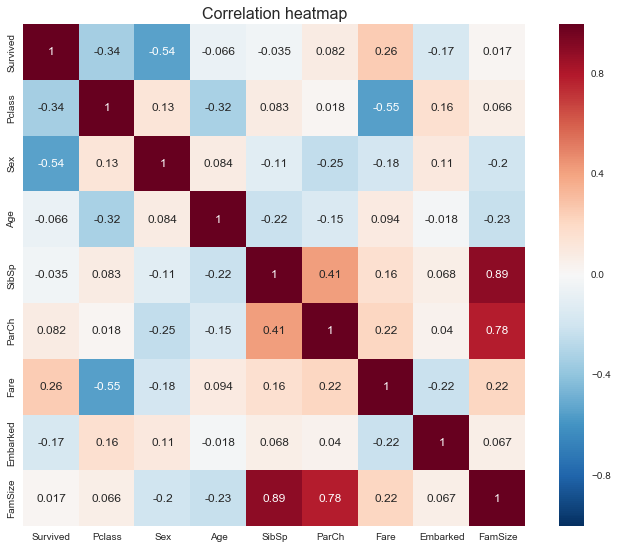

In [13]:
# calculate the correlation matrix
corr_mat = titanic_df.corr()

# create the heatmap plot using seaborn
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, annot=True, square=True)

plt.title("Correlation heatmap", size=16)

plt.show()

The plot shows that only a few features seem to correlate with eachother which means that most columns carry some unique information. The strongest correlations can be found between family size and the number of siblings/spouses/parents/children and fare prize and passenger class which is expected but nevertheless I will keep all these columns in the data for the rest of the analysis.

One can also see that the survival rate is mostly affected by the the passenger sex (-0.54), passenger class (-0.34) and the fare prize (0.26).

So let us have a look at the individual features.

For the categorical features (Pclass, Sex, Embarked) one can simply group the survival rates by the unique values and calculate their mean survival rate. For the features Sex and and Embarked the numerical values were mapped back to their categories for better readability.

In [14]:
# Pclass
titanic_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
# Sex
sex_survival = titanic_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

# remapping
sex_survival.loc[sex_survival['Sex'] == 0, 'Sex'] = 'female'
sex_survival.loc[sex_survival['Sex'] == 1, 'Sex'] = 'male'

sex_survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
# Embarked
embarked_survival = titanic_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

# remapping
embarked_survival.loc[embarked_survival['Embarked'] == 0, 'Embarked'] = 'C'
embarked_survival.loc[embarked_survival['Embarked'] == 1, 'Embarked'] = 'Q'
embarked_survival.loc[embarked_survival['Embarked'] == 2, 'Embarked'] = 'S'

embarked_survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


These calulations shows that passengeres from higher classes, women and people who embarked the Titanic in Cherbourg had higher survival rates than their counterparts.

The first two results correspond with my expectations as high class cabin were closer to the deck and wealthy and female passengere were probably the first ones to enter the lifeboats.

To explain the survival rate based on the embarkation port I further investigate the passengeres coming from Cherbourg.

In [17]:
# summary statistics for passengers from Cherbourg
titanic_df[titanic_df['Embarked'] == 0].describe()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked,FamSize
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.000000
mean,0.553571,1.886905,0.565476,30.434524,0.386905,0.363095,59.954144,0.0,1.750000
std,0.498608,0.944100,0.497176,14.177506,0.557213,0.660481,83.912994,0.0,0.926974
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.012500,0.0,1.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,13.697950,0.0,1.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,29.700000,0.0,1.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,1.000000,78.500025,0.0,2.000000
max,1.000000,3.000000,1.000000,71.000000,2.000000,3.000000,512.329200,0.0,5.000000


Comparing this summary table with the statistics for the whole data set shows that passengers who embarked in Cherbourg had on average higher ticket classes and paid more for their fares which might explain the higher survival rate.

To examine the influence of age on passenger survival, the data is summarized for different age groups. The `cut()` function splits the data into eight 10 year bins (because the oldest passenger is 80 years old). The corresponding age group for each passenger is added to the "AgeGroup" column.

The `agg()` function allows to apply multiple functions at once. `mean()` returns the average survival rate for each age group, `count()` counts the total number of passengers in each group and `sum()` only accounts for the survivors. Afterwards the survivors and the dead passengers of each age group are compared in a bar chart.

In [18]:
# create a new age group column in the data frame
titanic_df['AgeGroup'] = 0

# labels for the different age groups
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # age groups

# split the passengers into age groups of 10 years
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], range(0, 90, 10), labels=age_groups)

def age_group_summary(df, age_groups):
    """Create a result summary for the different age groups."""
    # calculate the survival rates and counts for the different age groups
    age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])
    
    # reindex to get the correct order in the calculated data frame
    age_survival = age_survival.reindex(age_groups)
    
    # change the column headers
    age_survival.columns = age_survival.columns.droplevel() # remove multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survived']
    
    # create a new column containing the number of passengers that died
    age_survival['Died'] = age_survival['Total'] - age_survival['Survived']
    
    return age_survival
    
# calculate the survival rates for the different age groups
age_survival = age_group_summary(titanic_df, age_groups)

age_survival

,Survival rate,Total,Survived,Died
AgeGroup,,,,
1-10,0.593750,64,38,26
11-20,0.346154,156,54,102
21-30,0.358362,293,105,188
31-40,0.411483,209,86,123
41-50,0.352381,105,37,68
51-60,0.404762,42,17,25
61-70,0.235294,17,4,13
71-80,0.200000,5,1,4


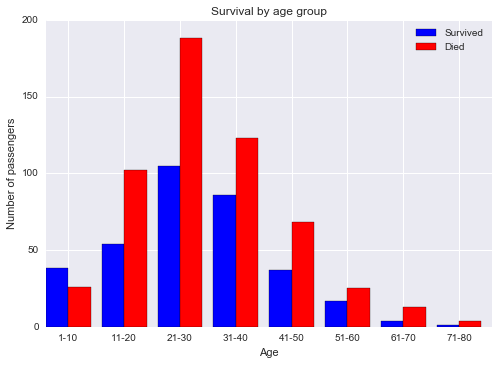

In [19]:
# vector for the bar positions
ind = np.arange(len(age_survival))

# bar width
width = 0.4

# bar plot
fig, ax = plt.subplots()

survived = age_survival['Survived'].values
bar1 = ax.bar(ind, survived, width=width, color='blue', label='Survived')

died = age_survival['Died'].values
bar2 = ax.bar(ind + width, died, width=width, color='red', 
              label='Died')

# format plot
ax.set(xlabel='Age', xticks=(ind + width), xticklabels=age_groups, ylabel='Number of passengers', 
       title='Survival by age group')
plt.legend()

plt.show()

The results from the age group analysis show little children (1-10 years) had the highest chance of survival from all the groups. The lowest survival rates were observed for passengers between 21 - 30 years, 61 - 70 years and 71 - 80 years.

To have a look at the influence of gender and age on passenger survival the data set is split into male and female passengers and the analysis for age groups from above is repeated.

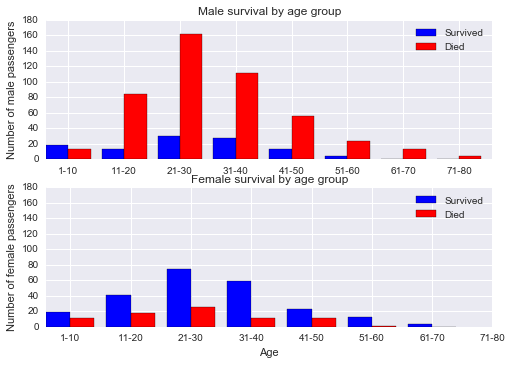

In [20]:
# create two new data frames for each gender
men_df = titanic_df.loc[titanic_df['Sex'] == 1]
women_df = titanic_df.loc[titanic_df['Sex'] == 0]

# calculate the survival rates for the different age groups for both genders
male_age_survival = age_group_summary(men_df, age_groups)
female_age_survival = age_group_summary(women_df, age_groups)

# vectors for the bar positions
ind = np.arange(len(male_age_survival))

# bar width
width = 0.4

# create 2 subplots in the figure
fig, (ax1, ax2) = plt.subplots(2, 1)

# male bar plot
survived = male_age_survival['Survived'].values
bar11 = ax1.bar(ind, survived, width=width, color='blue', label='Survived')

died = male_age_survival['Died'].values
bar12 = ax1.bar(ind + width, died, width=width, color='red', 
              label='Died')

# format male bar plot
ax1.set(xticks=(ind + width), xticklabels=age_groups, ylabel='Number of male passengers', 
       title='Male survival by age group')
ax1.legend()

# female bar plot
survived = female_age_survival['Survived'].values
bar21 = ax2.bar(ind, survived, width=width, color='blue', label='Survived')

died = female_age_survival['Died'].values
bar22 = ax2.bar(ind + width, died, width=width, color='red', 
              label='Died')

# format female bar plot
ax2.set(xlabel='Age', xticks=(ind + width), xticklabels=age_groups, ylabel='Number of female passengers', ylim=[0, 180], 
       title='Female survival by age group')
ax2.legend()

plt.show()

The visualisation shows the strong differences between the survival of male and female passengers. Children younger than 10 years had about equally high chances for survival independent of their gender. But for all the other age groups the gender has a big influence on survival. The plots show that passenger gender had a much stronger impact on survival than age.

To show the influence of the family size on passenger survival I group the data using the family size and display the mean survival rate for each group in a bar chart.

In [21]:
# calculate the survival rates for the different family sizes
fam_survival = titanic_df[['FamSize', 'Survived']].groupby('FamSize').mean()

fam_survival

,Survived
FamSize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


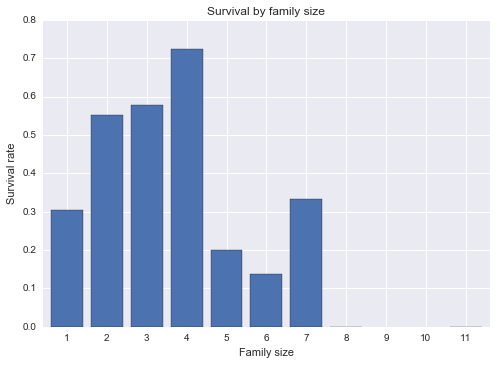

In [22]:
# vector for the bar positions
ind = np.arange(1, np.max(fam_survival.index.values) + 1) 

# add empty entries to the survival rates to get the same number of data points as in the bar position vector
fam_survival = fam_survival.reindex(ind)

# bar width
width = 0.8

# bar plot
fig, ax = plt.subplots()

survival_rates = fam_survival['Survived'].values
ax.bar(ind, survival_rates, width)

# format plot
ax.set(xlabel='Family size', xticks=ind + width/2, xticklabels=ind.astype(int), xlim=[0.8, 12], ylabel='Survival rate', 
       title='Survival by family size')

plt.show()

It seems like family size also influenced survival rates. Survival rates increase up to family sizes of 4 people and then fall significantly for larger families.

The next parameter I want to look at is the fare each passenger paid. As this feature correlates with the ticket class I would expect higher fares correspond to higher survival rates. To characterize the different fare classes the data is split into 10 equally-sized quantiles using the `qcut()`function and the results are plotted in a bar chart.

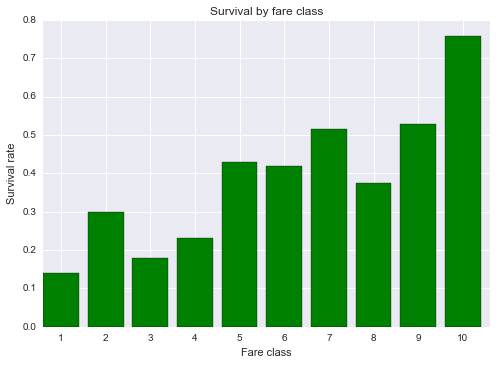

In [23]:
# create a new feature column containing the fare class
titanic_df["FareClass"] = pd.qcut(titanic_df['Fare'], 10)

# calculate the mean survival rates for all fare classes
fare_survival = titanic_df[['FareClass', 'Survived']].groupby(['FareClass']).mean()

# vector for the bar positions
ind = np.arange(len(fare_survival)) 

# bar width
width = 0.8

# bar plot
fig, ax = plt.subplots()

ax.bar(ind, fare_survival['Survived'], width, color='green')

# format plot
ax.set(xlabel='Fare class', xticks=(ind + width/2), xticklabels=np.arange(1, 11), ylabel='Survival rate', 
       title='Survival by fare class')

plt.show()

One can see that passengers with higher fares (which corresponds with a higher class) had better chances of survival in general.

The last features I investigated during my analysis are the titles extracted from the passenger names. To do this, the data was grouped by the titles and the mean survival rates are calculated for each group. For better comparison the `sort_values()` method is used to sort the groups in descending order of their survival rates. The Sex column is used to show which genders are represented in which title group.

In [24]:
# calculate the mean survival rates for all title groups
title_survival = titanic_df[['Title', 'Sex', 'Survived']].groupby(['Title']).mean().sort_values('Survived', ascending=False)
title_survival

,Sex,Survived
Title,,
Sir,1.000000,1.000000
Countess,0.000000,1.000000
Ms,0.000000,1.000000
Mme,0.000000,1.000000
Lady,0.000000,1.000000
Mlle,0.000000,1.000000
Mrs,0.000000,0.792000
Miss,0.000000,0.697802
Master,1.000000,0.575000


Again, these results show that passenger gender was the driving factor for survival. Except for the title "Sir" (which was only a single male passenger), female only groups had much higher chances of survial. "Dr." was the only title carried by both genders (about 85 % male and 15 % female).

## Conclusion

In this section all the insights gained from the analysis above are consolidated to answer the questions initially posed.

First, one can say that the detailed analysis confirmed the correlation heatmap and the most important factor for passengers survival seems gender. The mean survival rate calculations for the different passenger classes and the visualization of survival by fare class  showed that residing closer to the deck increased the chances of surviving the crash as well. The relation between fare/passenger class and gender has not been investigated in this report but I would expect gender to be more relevant, similar to the results found by investigating the different titles or the survival by age group. Age showed a slightly negative correlation with survival (the older the less likely to survive). But splitting the different age groups by gender again showed the discrepancy between male and female passengers. The family size feature showed a maximum survival rate for 4 people which decreased for lower and larger families.

To conclude I would say that sex is the feature which influenced passengers survival the most. Passenger class/fare prize rank second and are followed by age and family size. I can also answer my second question with yes and confirm that women, children and the uppper-class had the highest chances of survival and were more likely to reach a life boat than other passenger groups.